## Introduction

In the following notebook, I will be preparing Listings data pertaining to San Francisco Airbnb's. Raw data can be found [here](http://insideairbnb.com/get-the-data.html).


**Read in libraries**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Set notebook preferences**

In [19]:
#Set options for pandas
pd.set_option('display.max_columns',1_000)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_colwidth', 200)

#Set style for plot
plt.style.use('ggplot')

#Set path to visuals from EDA
visualizations = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Visualizations\Listings EDA/'

**Read in data**

In [20]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Data\02_Cleaned'

#Read in data
df = pd.read_csv(path + '/2020_0520_Listings_Cleaned.csv', parse_dates=['last_review'],
                 dtype = {'zipcode':'object'}
                )

### Data Overview

In [21]:
#Preview data
print('Data shape:',df.shape)
display(df.head(3))

Data shape: (88890, 48)


,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,cancellation_policy,city,cleaning_fee,extra_people,guests_included,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_name,host_response_rate,host_response_time,host_verifications,id,instant_bookable,is_location_exact,last_review,latitude,longitude,maximum_nights,minimum_nights,monthly_price,neighbourhood_cleansed,number_of_reviews,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_rating,reviews_per_month,room_type,security_deposit,weekly_price,zipcode
0,3,"TV, Cable TV ,Internet,Wifi,Kitchen, Pets live on this property ,Dog(s), Free street parking ,Heating, Family/kid friendly ,Washer,Dryer, Smoke detector , Carbon monoxide detector , First aid kit...",25,106,43,58,1.0,Real Bed,1.0,2.0,1,0,0,moderate,San Francisco,100.0,25.0,2,1.0,1169,1.0,1.0,Holly,90.0,within an hour,"email , phone , facebook , reviews , kba",958,1,1,2020-03-13,37.76931,-122.43386,1125,1,4200.0,Western Addition,240,170.0,Apartment,0,0,1,97.0,1.84,Entire home/apt,100.0,1120.0,94117
1,5,"Internet,Wifi,Kitchen,Heating, Family/kid friendly ,Washer,Dryer, Smoke detector , First aid kit , Fire extinguisher ,Essentials,Shampoo,Hangers, Hair dryer ,Iron, Laptop friendly workspace , Pri...",0,0,0,0,1.0,Real Bed,2.0,3.0,1,0,0,strict 14 with grace period,San Francisco,100.0,0.0,2,1.0,8904,1.0,0.0,Philip And Tania,100.0,within a day,"email , phone , reviews , kba , work email",5858,0,1,2017-08-06,37.74511,-122.42102,60,30,5500.0,Bernal Heights,111,235.0,Apartment,0,0,1,98.0,0.83,Entire home/apt,2.0,1600.0,94110
2,2,"TV,Internet,Wifi,Kitchen, Free street parking ,Heating,Washer,Dryer, Smoke detector , Carbon monoxide detector , Fire extinguisher , Lock on bedroom door ,Hangers, translation missing: en.hosting...",30,365,60,90,4.0,Real Bed,1.0,1.0,9,9,0,strict 14 with grace period,San Francisco,50.0,12.0,1,1.0,21994,1.0,0.0,Aaron,100.0,within an hour,"email , phone , reviews , jumio , government id",7918,0,1,2020-03-06,37.76555,-122.45213,60,32,1685.0,Haight Ashbury,19,65.0,Apartment,0,0,1,84.0,0.15,Private room,200.0,485.0,94117


### Quick EDA

**Price Distribution**

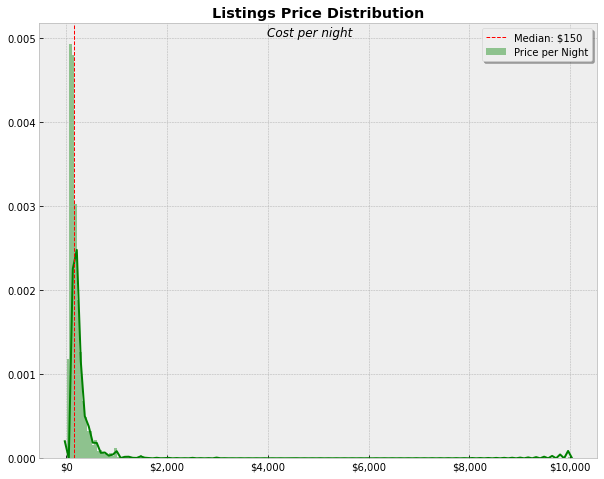

In [22]:
from IPython.display import Image
from IPython.core.display import HTML 

Image(filename= visualizations +  'price_hist.png', width=700, height=400)

**Price by Month**

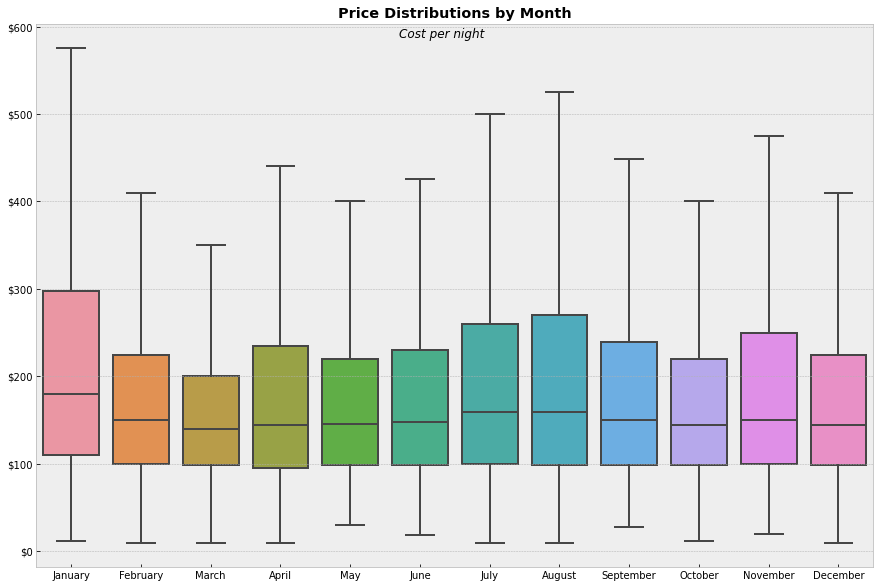

In [23]:
Image(filename= visualizations +  'month_price_box.png', width=700, height=400)

**Price by Day**

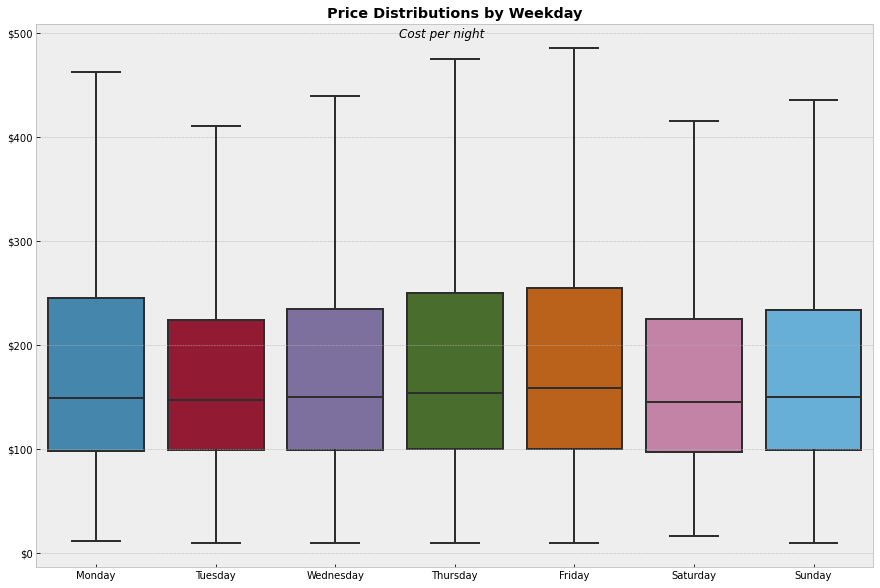

In [24]:
Image(filename= visualizations +  'weekday_price_box.png', width=700, height=400)

### Preprocessing

#### Drop Unnecessary columns

In [25]:
#Cols containing text data not needed for machine learning
cols =['host_id','id','city', 'host_name','weekly_price', 'monthly_price','zipcode','latitude','longitude','host_verifications']

#Drop cols
df.drop(cols, axis = 1, inplace = True)

### Feature Engineering

**Extract and Encode date information**

In [26]:
#Extract time data from datetime64 cols
for col in df.select_dtypes('datetime64'):
    df[col + '_year'] = df[col].dt.year.astype('object')
    df[col + '_month'] = df[col].dt.month_name()
    df[col + '_weekday'] = df[col].dt.day_name()

#Create Flags for Holidays and Weekends
#Import library for holiday flag
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

#Init calendar
cal = calendar()
holidays = cal.holidays(start=df.last_review.min(), end=df.last_review.max())

#Create holiday flag
df['holiday'] = df['last_review'].isin(holidays)

#Create weekend flag
df['weekend'] = df['last_review_weekday'].apply(lambda x: True if (x == 'Saturday')|(x == 'Sunday') else False)

#Drop last_review
df.drop('last_review', axis = 1, inplace = True)

#Check
display(df.head())

,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,cancellation_policy,cleaning_fee,extra_people,guests_included,host_has_profile_pic,host_identity_verified,host_is_superhost,host_response_rate,host_response_time,instant_bookable,is_location_exact,maximum_nights,minimum_nights,neighbourhood_cleansed,number_of_reviews,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_rating,reviews_per_month,room_type,security_deposit,last_review_year,last_review_month,last_review_weekday,holiday,weekend
0,3,"TV, Cable TV ,Internet,Wifi,Kitchen, Pets live on this property ,Dog(s), Free street parking ,Heating, Family/kid friendly ,Washer,Dryer, Smoke detector , Carbon monoxide detector , First aid kit...",25,106,43,58,1.0,Real Bed,1.0,2.0,1,0,0,moderate,100.0,25.0,2,1.0,1.0,1.0,90.0,within an hour,1,1,1125,1,Western Addition,240,170.0,Apartment,0,0,1,97.0,1.84,Entire home/apt,100.0,2020,March,Friday,False,False
1,5,"Internet,Wifi,Kitchen,Heating, Family/kid friendly ,Washer,Dryer, Smoke detector , First aid kit , Fire extinguisher ,Essentials,Shampoo,Hangers, Hair dryer ,Iron, Laptop friendly workspace , Pri...",0,0,0,0,1.0,Real Bed,2.0,3.0,1,0,0,strict 14 with grace period,100.0,0.0,2,1.0,1.0,0.0,100.0,within a day,0,1,60,30,Bernal Heights,111,235.0,Apartment,0,0,1,98.0,0.83,Entire home/apt,2.0,2017,August,Sunday,False,True
2,2,"TV,Internet,Wifi,Kitchen, Free street parking ,Heating,Washer,Dryer, Smoke detector , Carbon monoxide detector , Fire extinguisher , Lock on bedroom door ,Hangers, translation missing: en.hosting...",30,365,60,90,4.0,Real Bed,1.0,1.0,9,9,0,strict 14 with grace period,50.0,12.0,1,1.0,1.0,0.0,100.0,within an hour,0,1,60,32,Haight Ashbury,19,65.0,Apartment,0,0,1,84.0,0.15,Private room,200.0,2020,March,Friday,False,False
3,2,"TV,Internet,Wifi,Kitchen, Free street parking ,Heating, Family/kid friendly ,Washer,Dryer, Smoke detector , Carbon monoxide detector , Fire extinguisher , Lock on bedroom door , Private entrance ...",30,365,60,90,4.0,Real Bed,1.0,1.0,9,9,0,strict 14 with grace period,50.0,12.0,1,1.0,1.0,0.0,100.0,within an hour,0,1,90,32,Haight Ashbury,8,65.0,Apartment,0,0,1,93.0,0.12,Private room,200.0,2018,September,Wednesday,False,False
4,4,"TV,Internet,Wifi,Kitchen, Free street parking ,Heating, Family/kid friendly , Smoke detector , Carbon monoxide detector , First aid kit , Safety card , Fire extinguisher ,Essentials, Lock on bedr...",30,365,60,90,1.5,Real Bed,2.0,2.0,2,0,0,moderate,166.0,189.0,2,1.0,1.0,0.0,100.0,within a few hours,0,1,111,5,Western Addition,28,703.0,Condominium,1,1,1,97.0,0.22,Entire home/apt,0.0,2019,June,Friday,False,False


In [27]:
#Get list of cols with time data we want to encode
cols = df.filter(regex='last_review').columns

#Init empty dictionary
encodings = {}

#Create dictionary of encodings by doing a groupby on col to get avg price for value
for col in cols:
    encodings[col] = dict(df.groupby(col)['price'].mean())

#Run a loop that appends encoded values to df
for k,v in encodings.items():
    df[k + '_encoded'] = df[k].map(v)

#Drop cols from df
df.drop(cols, axis = 1, inplace = True)

#Check
display(df.filter(regex='last_review').head())

,last_review_year_encoded,last_review_month_encoded,last_review_weekday_encoded
0,217.140752,203.282081,241.669980
1,215.356888,223.910360,217.529621
2,217.140752,203.282081,241.669980
3,223.097898,202.583986,209.425241
4,212.760462,199.590960,241.669980


**Encode Neighborhoods**

In [28]:
#init dict
encode = {}

#Store encodings which will be mean price for each neighborhood
encode['neighbourhood_cleansed'] = df.groupby('neighbourhood_cleansed')['price'].mean()

#Map
for k,v in encode.items():
    df[k + '_encoded'] = df[k].map(v)
    
#Drop cols from df
df.drop('neighbourhood_cleansed', axis = 1, inplace = True)

#Check
display(df.filter(regex='neighbourhood_cleansed').head(15))   

,neighbourhood_cleansed_encoded
0,248.227387
1,185.378770
2,211.964688
3,211.964688
4,248.227387
5,220.274595
6,239.754751
7,220.274595
8,200.124367
9,211.964688


**Add amenities_count**

In [29]:
#Get a count of amenities
df['amenities_count'] = df['amenities'].str.count(',') + 1 #count commas and add 1 for last word

#Drop amenities column, host_verifications,None. Sort cols alphabetically
df.drop(columns = ['amenities'],axis = 1, inplace = True)
df = df.reindex(sorted(df.columns), axis = 1)

#Check size of df
print(df.shape)

(88890, 42)


**Remove outliers**

In [30]:
#Calculate IQR
q1,q3 = np.quantile(df.price, [.25,.75])
IQR = q3 - q1

#Set upper and lower limits for outliers to be removed
upper = q3 + (IQR * 1.5)
lower = q1 - (IQR * 1.5)

print('Length of df w/ outliers:',len(df))
print('Length of df w/o outliers:',len(df.loc[df.price <= upper]))

df = df.loc[df.price <= upper]

Length of df w/ outliers: 88890
Length of df w/o outliers: 82433


**Write Training and Test Data to CSV**

In [31]:
#Set path to save files
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Data\03_Processed'

#Write files
df.to_csv(path + '/2020_0608_Listings_Processed.csv')